# РГР «Анализ эффективности сортировок»

В данной работе мы исследуем понятие эффективности алгоритмов на примере сортировок.

# 1. Подготовительная работа

В первой части мы сделаем самый простой и интуитивно понятный анализ эффективности - сравним сортировки по их реальному времени работы, выраженному в секундах. Но для начала нам потребуется провести подготовительную работу и создать все необходимые вспомогательные функции.

Запустите код, содержащийся в ячейке ниже, чтобы инициализировать ноутбук.

In [78]:
# импортируем нужные библиотеки и кое-что инициализируем
import matplotlib.pyplot as plt
from functools import reduce
import random
import time
import operator
import math

import sys
print("rec", sys.getrecursionlimit()) # 1000
sys.setrecursionlimit(3000)

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0) # размеры графиков по умолчанию
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

counter = 0

# супер-дупер функция сравнения упорядоченности двух массивов
def arrays_are_similar(A, B):
    return A == B

# подсчет инверсий
def count_inverses(A):
    _count = 0
    for i in range(len(A) - 1):
        for j in range(i + 1, len(A)):
            if A[i] > A[j]:
                _count += 1
    return _count

rec 3000


### 1.1 Функции сортировки
Первое, с чего мы начнем - с реализации самих сортировок. Наши функции будут получать на вход массив и **производить сортировку прямо в нем**. Оставьте имена функций такими, как они есть сейчас в шаблоне, а названия сортировок запишите в соответствующие переменные.

После каждой реализованной сортировки запускайте код из ячейки, которая идет после - он проверит корректность ваших алгоритмов.

*Некоторые общие правила написания кода в ноутбуке:*
- *Здесь и далее в работе вам необходимо писать код только в специально обозначенных секциях TODO между комментариями "НАЧАЛО ВАШЕГО КОДА" и "КОНЕЦ ВАШЕГО КОДА"*
- *Не создавайте своих собственных глобальных переменных*
- *Не переименовывайте функции и переменные, которые уже созданы в шаблоне*
- **Запускайте все ячейки по мере продвижения по РГР - даже те, в которых вам ничего не надо программировать**
- *Ячейки с надписью "служебная ячейка" проверяют корректность ваших реализаци с помощью дополнительных тестов*
- В ячейках с вопросами ответ надо вписывать на место слов "ВПИШИТЕ СЮДА ВАШ ОТВЕТ" (даже в том случае, если ответом является значение параметра, которое вы подобрали опытным путем в ячейке с кодом перед вопросом).

In [79]:
################################################################################
# TODO: Реализуйте четыре заданные вам квадратичные сортировки (simple_sort_*),#
#       сортировку Шелла (shell_sort) и одну эффективную (effective_sort)      #
#       с ее вспомогательной процедурой                                        #
################################################################################
# выбором, вставками, расческой, шейкерная, Шелла, быстрая
s1_name = "выбором"
def simple_sort_1(a):
    ### НАЧАЛО ВАШЕГО КОДА
    for i in range(len(a) - 1):
        next_min = a[i]
        next_min_ind = i
        for j in range(i+1, len(a)):
            if a[j] <= next_min:
                next_min = a[j]
                next_min_ind = j

        a[i], a[next_min_ind] = a[next_min_ind], a[i]
    ### КОНЕЦ ВАШЕГО КОДА

s2_name = "вставками"
def simple_sort_2(a):
    ### НАЧАЛО ВАШЕГО КОДА
    for i in range(len(a) - 1):
        for j in range(i+1, 0, -1):
            if a[j] < a[j - 1]:
                a[j], a[j - 1] = a[j - 1], a[j]
            else:
                break
    ### КОНЕЦ ВАШЕГО КОДА

s3_name = "расческой"
def simple_sort_3(a):
    ### НАЧАЛО ВАШЕГО КОДА
    len_a = len(a)
    factor = 1.3
    step = len_a / factor

    i_step = int(step)
    while step >= 1:
        for i in range(len_a - i_step):
            if a[i] > a[i + i_step]:
                a[i], a[i + i_step] = a[i + i_step], a[i]

        step /= factor
        i_step = int(step)
    ### КОНЕЦ ВАШЕГО КОДА

s4_name = "шейкерная"
def simple_sort_4(a):
    ### НАЧАЛО ВАШЕГО КОДА
    left = 0
    right = control = len(a) - 1

    while left < right:
        for i in range(left, right):
            if a[i] > a[i + 1]:
                a[i], a[i + 1] = a[i + 1], a[i]
                control = i

        right = control

        for i in range(right, left, -1):
            if a[i - 1] > a[i]:
                a[i - 1], a[i] = a[i], a[i - 1]
                control = i

        left = control
    ### КОНЕЦ ВАШЕГО КОДА

es_name = "быстрая"
def effective_sort(A):
    ### НАЧАЛО ВАШЕГО КОДА
    quickSort3Way(A)
    ### КОНЕЦ ВАШЕГО КОДА
  
def quickSort3Way(A, left=0, right=None):
    # если параметр right == None, то это первый вызов и надо исправить его на реальное значение
    if right == None:
        right = len(A) - 1

    # если массив пустой или состоит всего из одного элемента, заканчиваем
    if len(A) == 0 or left >= right:
        return

    # инициализируем все возможные указатели
    lt, gt = left, right

    i = left + 1

    # производим трехпутевое разбиение за один проход в соответствии с алгоритмом
    while i <= gt:
        if A[i] < A[lt]:
            A[i], A[lt] = A[lt], A[i]
            i += 1
            lt += 1
        elif A[i] == A[lt]:
            i += 1
        elif A[i] > A[lt]:
            A[i], A[gt] = A[gt], A[i]
            gt -= 1

    # рекурсивно сортируем обе части (кроме той, что равна опорному элементу!)
    quickSort3Way(A, left, lt - 1)
    quickSort3Way(A, gt + 1, right)


def shell_sort(a):
    ### НАЧАЛО ВАШЕГО КОДА
    arr_len = len(a)
    steps = (1, 4, 10, 23, 57, 132, 301, 701, 1750)[::-1]

    for h in steps:
        if h > len(a): continue
        for i in range(h, arr_len):
            for j in range(i, 0, -h):
                if j - h < 0:
                    break
                if a[j] < a[j - h]:
                    a[j], a[j - h] = a[j - h], a[j]
                else:
                    break
    ### КОНЕЦ ВАШЕГО КОДА
################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

Проверим корректность ваших алгоритмов - запустите следующую ячейку кода. Для того, чтобы продолжать дальше, вердикт по всем сортировкам должен быть OK.

In [80]:
###################################################################################################################
# В коде, в котором вам ничего не нужно править, лучше ничего не править, иначе что-нибудь где-нибудь сломается...#
###################################################################################################################
alg_names = [s1_name, s2_name, s3_name, s4_name, es_name]
algorithms = {
"simple_sort_1": { "func": simple_sort_1, "name": s1_name, "data": { "random": [], "reverse": [], "almost": [], "normal": []}},
"simple_sort_2": { "func": simple_sort_2, "name": s2_name, "data": { "random": [], "reverse": [], "almost": [], "normal": []}},
"simple_sort_3": { "func": simple_sort_3, "name": s3_name , "data": { "random": [], "reverse": [], "almost": [], "normal": []}},
"simple_sort_4": { "func": simple_sort_4, "name": s4_name, "data": { "random": [], "reverse": [], "almost": [], "normal": []}},
"shell_sort": { "func": shell_sort, "name": "Шелла", "data": { "random": [], "reverse": [], "almost": [], "normal": []}},
"effective_sort": { "func": effective_sort, "name": es_name, "data": { "random": [], "reverse": [], "almost": [], "normal":[]}}}

initial_array = list(range(10))
for key in algorithms:
    print(algorithms[key]["name"], end = ": ")
    test_array = list(range(10))
    random.shuffle(test_array)
    algorithms[key]["func"](test_array)
    if (arrays_are_similar(initial_array, test_array)):
        print("OK")
    else:
        print("НЕВЕРНО " + str(test_array))

выбором: OK
вставками: OK
расческой: OK
шейкерная: OK
Шелла: OK
быстрая: OK


In [81]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
simple_sort_1(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [82]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
simple_sort_2(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [83]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
simple_sort_3(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [84]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
simple_sort_4(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [85]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
shell_sort(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [86]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
effective_sort(test_array)
assert arrays_are_similar(initial_array, test_array)
### END TESTS

### 1.2 Генератор случайных массивов

Теперь нам потребуется процедура, которая будет генерировать случайные массивы для последующей сортировки. Функция должна уметь создавать один из четырех типов массивов:
- случайный (равномерно),
- упорядоченный,
- перевернутый (упорядоченный наоборот),
- почти упорядоченный.

Размер массива и тип упорядоченности передаются в качестве входных параметров.

Почти упорядоченным массивом будем считать такой, в котором количество инверсий **I** удовлетворяет условиям: $\frac12 n\leq I\leq 2n$, где n - размер массива. (*Пример идеи для создания почти упорядоченного массива: разбить массив на тройки и в каждой поменять местами первый и третий элементы.*)

In [87]:
# словарь типов сортировки, понадобится в дальнейшем
sort_types = [ ('random', 'случайный'),
               ('reverse', 'в обратном порядке'),
               ('almost', 'почти упорядоченный'),
               ('normal', 'упорядоченный')]

################################################################################
# TODO: Реализуйте функцию generate_array                                      #
################################################################################
def random_gen(n: int):
    from random import shuffle

    arr = [x for x in range(n)]
    shuffle(arr)
    return arr


def reverse_gen(n: int):
    return [x for x in range(n - 1, -1, -1)]


def almost_gen(n: int):
    arr = [x for x in range(n)]

    for i in range(n - 3):
        arr[i], arr[i + 2] = arr[i + 2], arr[i]

    return arr


def normal_gen(n: int):
    return [x for x in range(n)]


def generate_array(n, sort_type = 'random'):
    """
    Генерация случайного массива.

    Вход:
    - n: (целое) размер генерируемого массива
    - sort_type: тип создаваемого массива:
     - 'random': случайный
     - 'reverse': в обратном порядке
     - 'almost': почти упорядоченный
     - 'normal': упорядоченный

    Выход:
    Массив нужного размера и типа упорядоченности.
    """
    A = []
    
    ### НАЧАЛО ВАШЕГО КОДА
    if sort_type == 'random':
        A = random_gen(n)
    elif sort_type == 'reverse':
        A = reverse_gen(n)
    elif sort_type == 'almost':
        A = almost_gen(n)
    else:
        A = normal_gen(n)
    ### КОНЕЦ ВАШЕГО КОДА

    
    return A
################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

Проверим корректность вашего кода. Запустите следующую ячейку и прочитайте, что напечатается после нее.

In [88]:
initial_array = list(range(10))
test_array = generate_array(10, sort_type = 'normal')
print("Генерация упорядоченного массива: ", end = "")
print("OK") if (arrays_are_similar(initial_array, test_array)) else print("НЕВЕРНО " + str(test_array))

initial_array = list(range(10))
initial_array.reverse()
test_array = generate_array(10, sort_type = 'reverse')
print("Генерация массива в обратном порядке: ", end = "")
print("OK") if (arrays_are_similar(initial_array, test_array)) else print("НЕВЕРНО " + str(test_array))

OK = True
print("Генерация почти упорядоченного массива: ", end = "")
_inverses = 0
for _ in range(50):
    _len = random.randint(10, 100)
    test_array = generate_array(_len, sort_type = 'almost')
    _inverses = count_inverses(test_array)
    if (_inverses > 2 * _len or _inverses < 0.5 * _len):
        print("НЕВЕРНО " + str(test_array) + ", количество инверсий: " + str(_inverses))
        OK = False
        break
if OK:
    print("ОК")

OK = False
print("Генерация случайного массива: ", end = "")
_inverses, _gmean, _lmean = 0, False, False
for _ in range(50):
    _len = random.randint(10, 100)
    test_array = generate_array(_len, sort_type = 'random')
    _inverses = count_inverses(test_array)
    if (_inverses >= (_len * (_len - 1)) / 4):
        _gmean = True
    elif (_inverses < (_len * (_len - 1)) / 4):
        _lmean = True
if (_gmean and _lmean):
    print("OK")
else:
    print("НЕВЕРНО")


Генерация упорядоченного массива: OK
Генерация массива в обратном порядке: OK
Генерация почти упорядоченного массива: ОК
Генерация случайного массива: OK


In [89]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
test_array = generate_array(10, sort_type = 'normal')
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [90]:
# служебная ячейка
### BEGIN TESTS
initial_array = list(range(10))
initial_array.reverse()
test_array = generate_array(10, sort_type = 'reverse')
assert arrays_are_similar(initial_array, test_array)
### END TESTS

In [91]:
# служебная ячейка
### BEGIN TESTS
OK = True
_inverses = 0
for _ in range(50):
    _len = random.randint(10, 100)
    test_array = generate_array(_len, sort_type = 'almost')
    _inverses = count_inverses(test_array)
    if (_inverses > 2 * _len or _inverses < 0.5 * _len):
        OK = False
        break
assert OK
### END TESTS

In [92]:
# служебная ячейка
### BEGIN TESTS
OK = False
_inverses, _gmean, _lmean = 0, False, False
for _ in range(50):
    _len = random.randint(10, 100)
    test_array = generate_array(_len, sort_type = 'random')
    _inverses = count_inverses(test_array)
    if (_inverses >= (_len * (_len - 1)) / 4):
        _gmean = True
    elif (_inverses < (_len * (_len - 1)) / 4):
        _lmean = True
assert (_gmean and _lmean)
### END TESTS

### 1.3 Серийный испытатель

Последний элемент, необходимый нам для изучения эффективности алгоритмов сортировки, это **функция, которая будет проводить заданное количество испытаний на входных данных одинаковой структуры**.

Измерять время выполнения программ можно двумя способами:
- в абсолютном выражении, т.е. замерять количество секунд, которое она работает,
- в относительном выражении, т.е. замерять количество условных операций ("шагов"), которое она делает.

Первый способ даст нам практическое понимание быстродействия нашего алгоритма на реальном компьютере при выполнении реальной задачи, а второй используется для теоретических оценок в теории алгоритмов.

Однако, на практике и в том, и в другом случае процесс измерения сопряжен с рядом проблем. Если мы измеряем реальное время, то всю картину может портить кэш микропроцессора, который, если говорить совсем грубо - ускоряет работу кода, выполняющегося не первый раз. Причем так как наша программа не единственный процесс в системе, то подобные вмешательства носят непредсказуемый характер. Также на точность измерений могут влиять некоторые другие системные факторы, зависящие от операционной системы и того, как и с помощью чего мы будем проводить замеры. В частности, если мы пишем код на таком языке как Питон, то в некоторые моменты времени, независимо от наших желаний, может начать работу встроенный в эту среду сборщик мусора, который решит освободить память, занимаемую неиспользуемыми нами объектами.

Если же мы измеряем время в абстрактных шагах, то необходимо помнить, что время работы большинства алгоритмов сортировки сильно зависит от структуры исходных данных - чем больше инверсий, тем дольше они работают. Поэтому на случайных массивах они будут выполнять случайный объем работы.

Если построить график функции $T(n)$, не учитывая всех этих факторов, то вместо гладкой линии мы получим ломаную с многочисленными "выбросами". Чтобы сгладить этот «недостаток», пользуются несколькими способами. Первый - проводить не одно испытание, а целую серию, а затем усреднять результат. Второй - перебирать значения размеров массива $n$ не подряд, а с некоторым шагом, так как значения $T(n)$ и $T(n+1)$ находятся очень близко друг к другу и перечисленные выше факторы могут сильно их исказить.

К этим вопросам мы еще вернемся более детально, а сейчас напишем код требуемой функции.

In [93]:
################################################################################
# TODO: Реализуйте функцию do_trials                                           #
################################################################################


def do_trials(func, array_len, sort_type, measure_type = 'time', trials = 1):
    """
    Выполняет trials испытаний функции func (для measure_type равного 'time') следующим образом:
     1) создается список массивов длины array_len с типом упорядоченности sort_type,
     2) засекается время начала процесса,
     3) на созданных массивах поочередно вызывается функция сортировки func,
     4) засекается время окончания процесса,
     5) разница между временем окончания и начала процесса делится на количество испытаний и возвращается в качестве ответа.
    "Засечь" время можно, вызывав функцию time.process_time() - она вернет количество прошедших после запуска секунд

    Случай measure_type == 'counter' пока не обрабатывайте.

    Вход:
    - func: (функция) функция сортировки
    - array_len: (целое число) размер массивов, на которых проводятся испытания
    - sort_type: тип создаваемого массива:
     - 'random': случайный
     - 'reverse': в обратном порядке
     - 'almost': почти упорядоченный
     - 'normal': упорядоченный
    - measure_type: тип проводимых измерений:
     - 'time': измерять время выполнения функций
     - 'counter': измерять количество выполняемых функциями "шагов"
    - trials: (целое число) количество проводимых испытаний

    Выход:
    Среднее значение измеряемой величины.
    """

    global counter # переменная понадобится вам позже, при первоначальной реализации оставьте ее как есть
    result = 0
    
    ### НАЧАЛО ВАШЕГО КОДА
    arrays = [generate_array(array_len, sort_type) for _ in range(trials)]  # must be trials

    if measure_type == 'time':
        from time import process_time

        time_start = process_time()
        for arr in arrays:
            func(arr)
        time_end = process_time()


        # время в миллисекундах
        result = (time_end - time_start) / array_len
    elif measure_type == 'counter':
        counter = 0

        for arr in arrays:
            func(arr)

        result = counter / trials
    else:
        raise ValueError(f"Not knows measure_type: {measure_type}")
    ### КОНЕЦ ВАШЕГО КОДА
    
    return result

################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

In [94]:
def do_series(func, R, step, sort_type, measure_type, trials, debug = False):
    """
    Выполняет серию испытаний функции func для массивов длиной от 1 до R с шагом step.

    Вход:
    - func: (функция) функция сортировки
    - R: (целое число) правая граница для перебора размеров массивов
    - step: (целое число) шаг, с которым перебираются размеры массивов
    - sort_type: см. описание функции do_trials
    - measure_type: см. описание функции do_trials
    - trials: см. описание функции do_trials

    Выход:
    Массив результатов испытаний.
    """

    result = []
    _step_size = R // (10 * step)
    for size in range(1, R, step):
        if (debug and size % _step_size < 2):
            print(".", end = "")
        result.append(do_trials(func, size, sort_type, measure_type, trials))
    return result

Все готово для проведения испытаний. Заключительный тест - попробуем отсортировать случайный массив на 500 элементов каждой сортировкой. Во всех случаях ответ должен быть больше нуля, но меньше 1 секунды.

In [95]:
print("Время сортировки случайного массива на 500 элементов:")
for key in algorithms:
    print(algorithms[key]["name"], end = ": ")
    result = do_trials(algorithms[key]["func"], 500, 'random', 'time', 1)
    if (result == 0):
        print("%.10f" % result + " (СЛИШКОМ БЫСТРО! Видимо, вы работете на суперкомпьютере)")
    elif (result > 1):
        print("%.4f" % result + " (ДОЛГО!)")
    else:
        print("%.8f" % result)

### BEGIN TESTS
for key in algorithms:
    result = do_trials(algorithms[key]["func"], 500, 'random', 'time', 1)
    assert (result > 0 and result < 1)
### END TESTS

Время сортировки случайного массива на 500 элементов:
выбором: 0.00000805
вставками: 0.00001440
расческой: 0.00000127
шейкерная: 0.00001706
Шелла: 0.00000224
быстрая: 0.00000181


# 2. Анализ времени работы функций
### 2.1 Устойчивость измерений

Для начала давайте попробуем построить наш первый график. Воспользуемся библиотекой matplotlib и самым простым способом построения графика - по точкам. Для этого достаточно передать функции plot() массив точек (значений функций), которые она соединит ломаной линией. Изучите код, приведенный ниже, со всеми комментариями, а затем выполните его (позапускайте несколько раз и посмотрите результат).

In [96]:
# правая граница для перебираемого размера массива n
R = 1000
# шаг, с которым перебираются границы массива
step = 100
# количество испытаний для каждого шага - результаты усредняются
trials = 1

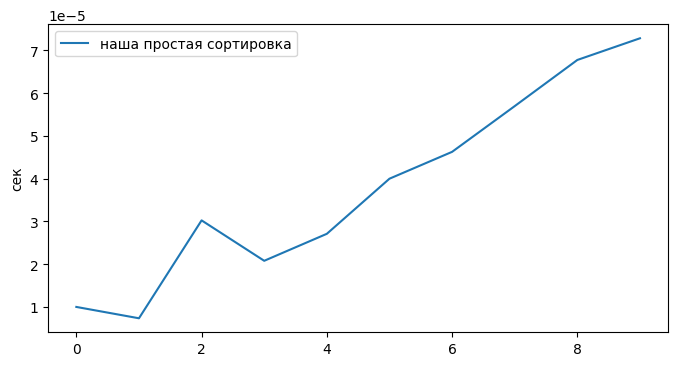

In [97]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
def our_very_simple_sort(A):
    for i in range(len(A)):
      index = i
      while index > 0 and A[index] < A[index - 1]:
         tmp = A[index]
         A[index] = A[index - 1]
         A[index - 1] = tmp
         index -= 1
    
# do_series возвращает массив значений...
result = do_series(our_very_simple_sort, R, step, 'reverse', 'time', trials)
# ...который мы дальше передаем функции рисования графиков, в параметре label передаем подпись к графику
# Если мы хотим изобразить более одной функции на одном графике, надо несколько раз вызвать plot
plt.plot(result, label = 'наша простая сортировка')
# с помощью ylabel задается подпись оси ординат
plt.ylabel('сек')
# команда legend печатает легенду с названиями всех графиков
plt.legend()
# команда show рисует получившийся график
plt.show()

Мы видим несколько "выбросов". Причина их описана выше в п. 1.3.

**Параметр trials**

Попробуем это исправить. Для начала протестируйте параметр trials - переберите вручную некоторые значения от 1 до 50 и посмотрите, как меняется вид графика. Это происходит, потому что одна сортировка массива из n элементов занимает незначительное время, а 10 или 50 подряд идущих сортировок массива из n элементов займет уже какое-то значимое время, которое нам удастся измерить, усреднив большую часть мелких "системных шумов". К сожалению, слишком большим этот параметр установить не удастся, т.к. весь процесс станет занимать слишком много времени.

Обратите внимание, что наш график будет выглядеть по-разному каждый раз, когда вы его строите (даже для одних и тех же значений параметров). Это из-за того, что внешний "системный шум" дает о себе знать. По этой же причине нам пока еще не удалось совсем избавиться от иногда встречающихся внезапных выбросов (возможно, в эти моменты сборщик мусора решает прибраться у нас в коде).

**Параметр R**

Теперь изучим еще один параметр - R. Установите trials, равным 5, и попробуйте перебрать вручную некоторые значения R от 70 до 300. Посмотрите, как меняется характер графика. Пики становятся все более острыми, а сам график приобретает вид более-менее гладкой линии. Это происходит из-за уменьшения масштаба по оси X. Тем не менее "дерганность" может сохраняться даже для сравнительно больших R - это связано с тем, что мы делаем слишком частые измерения.

**Параметр step**

Чтобы избавиться от этой проблемы обратимся к третьему параметру - step. Он регулирует величину шага, с которым мы перебираем размеры массива. Пусть trials = 5, R = 300 - попробуйте построить графики с step = 10, 20, 30 и понаблюдайте, как они становятся все более и более плавными. В действительности, при step = 30 (10% от n), мы вычисляем всего 10 точек, а библиотека matplotlib соединяет их отрезками, так что получается внешне сглаженная ломаная линия. Замеры отстоят друг от друга на достаточно большом расстоянии, поэтому квадратическая природа нашей функции начинает давать о себе знать.

В заключение попробуйте поставить следующие параметры: R = 1000, step = 100, trials = 1 - и постройте несколько раз график. Как видим, при достаточно больших шагах становится не столь существенным параметр trials.

### 2.2 Сравнительный анализ времени работы всех сортировок

Построим наши первые графики. Нам них изображены все шесть сортировок для каждого из четырех типов входного массива. В данном блоке ничего программировать не нужно. Нужно только дождаться окончания процесса.

строим графики для типа массива 'случайный': 
  - выбором: ..........done
  - вставками: ..........done
  - расческой: ..........done
  - шейкерная: ..........done
  - Шелла: ..........done
  - быстрая: ..........done

строим графики для типа массива 'в обратном порядке': 
  - выбором: ..........done
  - вставками: ..........done
  - расческой: ..........done
  - шейкерная: ..........done
  - Шелла: ..........done
  - быстрая: ..........done

строим графики для типа массива 'почти упорядоченный': 
  - выбором: ..........done
  - вставками: ..........done
  - расческой: ..........done
  - шейкерная: ..........done
  - Шелла: ..........done
  - быстрая: ..........done

строим графики для типа массива 'упорядоченный': 
  - выбором: ..........done
  - вставками: ..........done
  - расческой: ..........done
  - шейкерная: ..........done
  - Шелла: ..........done
  - быстрая: ..........done



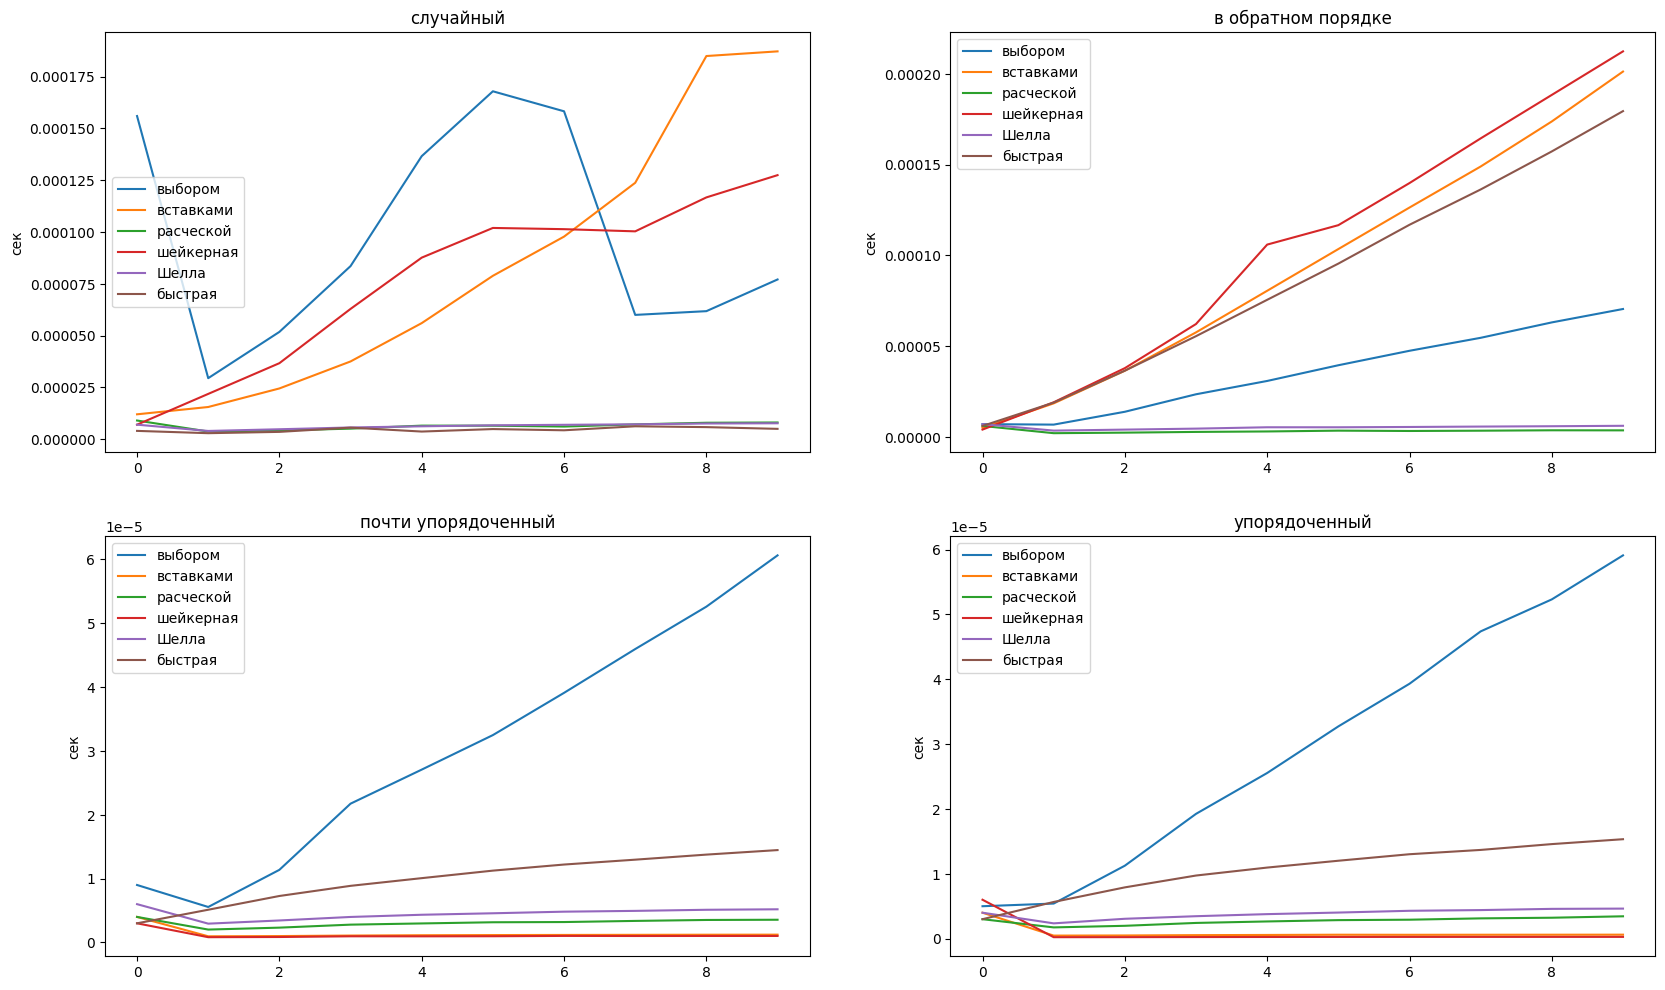

In [98]:
_old_value = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20.0, 12.0)

R = 1500
step = R // 10
trials = 3

for plot in range(4):
    plt.subplot(2, 2, plot + 1)
    print("строим графики для типа массива '" + sort_types[plot][1] + "': ")
    for key in algorithms:
        print("  - " + algorithms[key]["name"], end = ': ')
        result = do_series(algorithms[key]["func"], R, step, sort_types[plot][0], 'time', trials, debug = True)
        plt.plot(result, label = algorithms[key]["name"])
        print("done")
    print("")
    plt.title(sort_types[plot][1])
    plt.ylabel('сек')
    plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = _old_value

>**Вопрос №1**
>
>Какие общие выводы вы можете сделать по этим графикам относительно всех исследуемых сортировок?

> ### На разных типах массивах разные сортировки показывают разные результаты. Удивительно, но наивная сортировка выбором на случайных данных работает лучше, чем некоторые другие сортировки

### 2.3 Анализ времени работы каждой сортировки в зависимости от типа входных данных

Теперь построим отдельные графики для каждой сортировки, на которых проанализируем, как ведут себя сортировки на входных данных различной структуры. Первый график построен уже за вас. Ваша задача - построить остальные по образу и подобию.

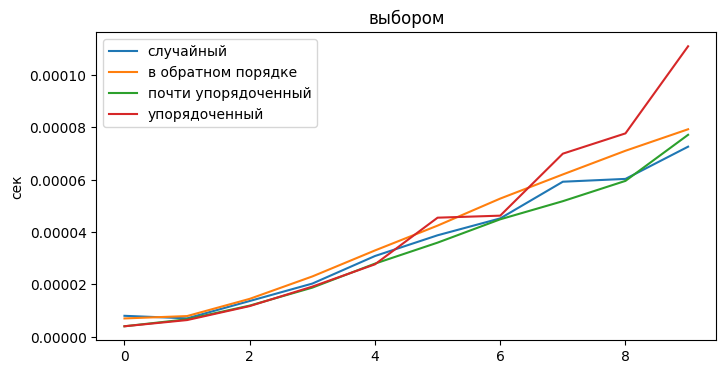

In [99]:
R = 1000
step = R // 10
trials = 5

for plot in range(4):
    result = do_series(simple_sort_1, R, step, sort_types[plot][0], 'time', trials)
    plt.plot(result, label = sort_types[plot][1])
    # запомним результаты данных испытаний, они нам пригодятся в дальнейшем. Для этого запишем
    # списки результирующих значений для каждого типа входных данных в словарь
    # algorithms["имя функции_сортировки"]["data"]["тип входа"], где
    # sort_types[plot][0] - название текущего типа входных данных: "random", "normal", "reverse", "almost"
    algorithms["simple_sort_1"]["data"][sort_types[plot][0]] = result
plt.title(s1_name)
plt.ylabel('сек')
plt.legend()
plt.show()

>**Вопрос №2**
>
>Обоснуйте, почему графики функции сложности данной сортировки выглядят именно так.

> ### Асимпотическое время этой сортировки не зависит от упорядоченности массива

Постройте подобные графики для оставшихся пяти сортировок. Вы можете воспользоваться способом с двумя вложенными циклами, как это было сделано выше, а можете построить отдельно каждый график.

***Не забудьте сохранить результаты*** в словаре <code>algorithms["имя функции_сортировки"]["data"]["тип входа"]</code>

В качестве дополнительного упражнения попробуйте вывести эти графики в два столбца, как это было в примере выше.

done done done done done done done done done done done done done done done done 

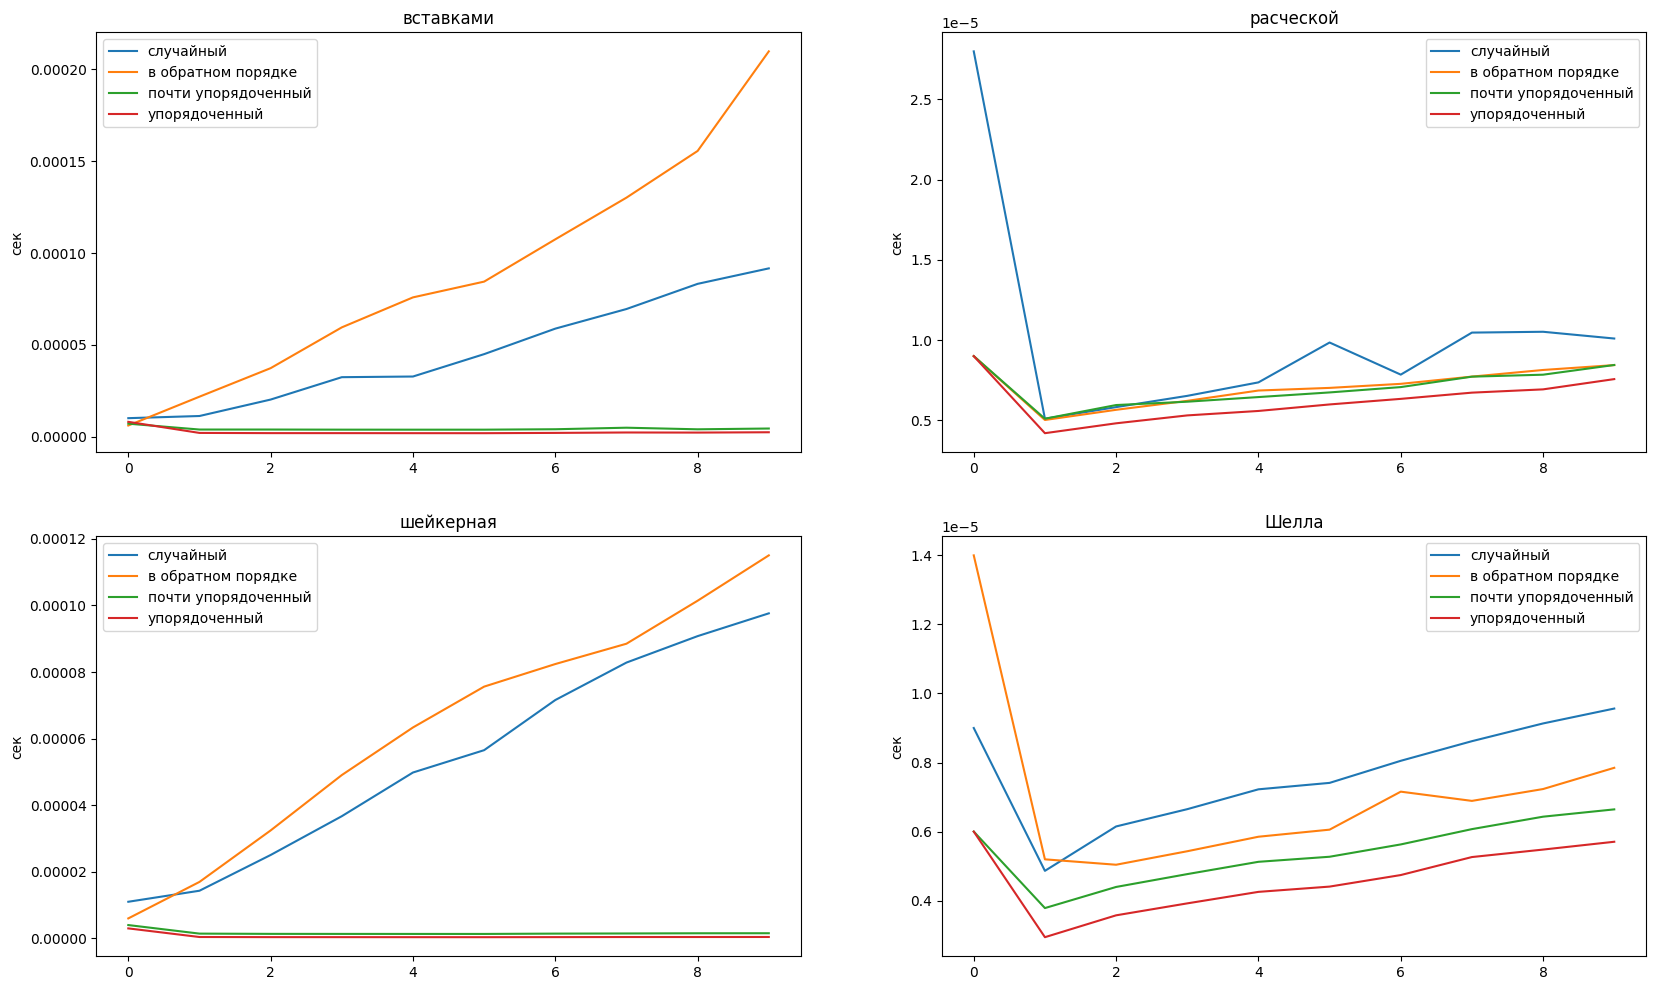

In [100]:
R = 500
step = R // 10
trials = 5

################################################################################
# TODO: Выведите графики для оставшихся сортировок                             #
################################################################################
### НАЧАЛО ВАШЕГО КОДА
_old_value = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20.0, 12.0)
cnt = 1
for key in algorithms:
    if algorithms[key]['name'] == s1_name or cnt == 5: continue
    plt.subplot(2, 2, cnt)
    cnt += 1
    for plot in range(4):
        result = do_series(algorithms[key]["func"], R, step, sort_types[plot][0], 'time', trials, debug = False)
        plt.plot(result, label = sort_types[plot][1])
        print("done", end=' ')
        algorithms[key]["data"][sort_types[plot][0]] = result
    plt.title(algorithms[key]['name'])
    plt.ylabel('сек')
    plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = _old_value
### КОНЕЦ ВАШЕГО КОДА
################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

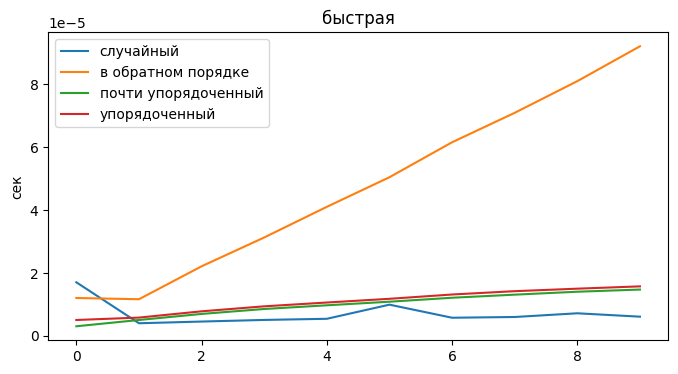

In [101]:
R = 500
step = R // 10
trials = 5

for plot in range(4):
    result = do_series(effective_sort, R, step, sort_types[plot][0], 'time', trials)
    plt.plot(result, label = sort_types[plot][1])
    # запомним результаты данных испытаний, они нам пригодятся в дальнейшем. Для этого запишем
    # списки результирующих значений для каждого типа входных данных в словарь
    # algorithms["имя функции_сортировки"]["data"]["тип входа"], где
    # sort_types[plot][0] - название текущего типа входных данных: "random", "normal", "reverse", "almost"
    algorithms["effective_sort"]["data"][sort_types[plot][0]] = result
plt.title(algorithms['effective_sort']['name'])
plt.ylabel('сек')
plt.legend()
plt.show()

In [102]:
# служебная ячейка
### BEGIN TESTS
for key in algorithms:
    for plot in range(4):
        assert(len(algorithms[key]["data"][sort_types[plot][0]]) > 0)
### END TESTS

>**Вопрос №3**
>
>Обоснуйте графики для каждой из пяти сортировок. Что вы можете сказать об их степени зависимости от структуры входных данных и ее причинах.

> Выбором: на каждом типе алгоритм проходит по всему массиву и берет минимальный, поэтому отсортированность никак не влияет на время выполнения.

> Вставками: для этого алгоритма уже важна отсортированность массива, поэтому на почти упорядоченном и упорядоченном массиве асимптотика близка к линейной.

> Расческой: данный алгоритм сравнивает элементы через некоторый пропуск, итеративно уменьшая его, поэтому тип отсортированности мало влияет на конечное время работы.

> Шейкерная: аналогично сортировкой вставками.

> Шелла: аналогично сортировкой расческой.

# 3. Исследование констант $C$ и $n_0$
### 3.1 Подсчет количества шагов

В данной части работы нам предстоит проводить опыты на небольших массивах - от 2 до 100 элементов. Анализировать реальное время выполнения функций сортировки в данном случае непрактично по причинам, описанным в предыдущей части. Поэтому вместо секунд будем подсчитывать абстрактные "шаги" выполнения функции (то есть будем вычислять функцию $T(n)$ в явном виде).

Для этого нам необходимо внести изменения в наши функции сортировки, а именно - добавить подсчет выполняемых ими шагов. Для начала определимся, каким образом мы это будем делать.

1. Для того, чтобы не усложнять весь процесс (особенно с рекурсивными сортировками), будем считать, что каждая функция будет сохранять количество выполненных ей шагов в **глобальной** переменной counter.
2. Во-вторых, определимся с понятием шага - шагом будем считать **одну строку кода программы, за исключением строк else и elif**. В этом случае достаточно просто внедрить в наши функции код, считающий количество шагов - мы просто автоматически дописываем инструкцию <code>counter += 1</code> **перед каждой строкой программы** (на том же уровне табуляции).
3. Так как операции присваивания играют существенную роль в итоговой оценке сложности, то договоримся, что не будем использовать совмещенные операции присваивания типа <code>i, j = j, i</code> (либо будем перед такими инструкциями ставить <code>counter += 3</code>.)
4. В некоторых сортировках вы будете использовать встроенные функции типа len или max, сложность которых линейно зависит от размера входных данных. В этом случае нужно перед такими вызовами ставить <code>counter += len(X)</code>.

В следующем блоке представлен пример некоторой исходной функции и ее модифицированный вариант. Данную ячейку можно не выполнять - она приведена только для примера.

In [103]:
def our_very_simple_sort(A):
    for i in range(len(A)):
        index = i
    while index > 0 and A[index] < A[index - 1]:
        tmp = A[index]
        A[index] = A[index - 1]
        A[index - 1] = tmp
        index -= 1
    # следующие инструкции не имеют особого смысла и добавлены для примера
    if index == len(A):
        return 0
    else:
        return 1

# модифицированная версия функции выше
def our_very_simple_sort_counted(A):
    # объявляем глобальную переменную counter. Обнулять ее не нужно - это будет делать тот, кто нас вызывает
    global counter

    # далее вставляем counter += 1 перед каждой строкой, кроме else и elif
    # при желании сделать более точную оценку, можно для строк с неконстантной сложностью прибавлять не +1,
    # а нужное количество "шагов".
    counter += 1
    for i in range(len(A)):
        counter += 1
        index = i
        counter += 1
        while index > 0 and A[index] < A[index - 1]:
            counter += 1
            tmp = A[index]
            counter += 1
            A[index] = A[index - 1]
            counter += 1
            A[index - 1] = tmp
            counter += 1
            index -= 1
    counter += 1
    if index == len(A):
        counter += 1
        return 0
    else:
        counter += 1
        return 1

В следующем блоке кода запишите модифицированные версии всех своих сортировок. Обращаем ваше внимание, что ничего нового здесь программировать не нужно, но надо очень аккуратно вставить инкремент счетчика в нужные места. Если вы по недосмотру напутаете где-нибудь с табуляцией или пропустите один из инкрементов, то это может отразиться на итоговых результатах.

In [104]:
############################################################################################
# TODO: Модифицируйте четыре заданные вам квадратичные сортировки (counted_simple_sort_*), #
#       сортировку Шелла (counted_shell_sort) и одну эффективную (counted_effective_sort)  #
#       с ее вспомогательной процедурой. Помните, что изменить нужно и рекурсивный вызов   #
#       внутри эффективной сортировки.                                                     #
############################################################################################
def counted_simple_sort_1(a):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    counter += 1
    arr_len = len(a)
    counter += 1
    for i in range(arr_len - 1):
        counter += 1
        next_min = a[i]
        counter += 1
        next_min_ind = i
        counter += 1
        for j in range(i+1, arr_len):
            counter += 1
            if a[j] <= next_min:
                counter += 1
                next_min = a[j]
                counter += 1
                next_min_ind = j

        counter += 3
        a[i], a[next_min_ind] = a[next_min_ind], a[i]
    ### КОНЕЦ ВАШЕГО КОДА

def counted_simple_sort_2(a):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    counter += 1
    arr_len = len(a)
    counter += 1
    for i in range(arr_len - 1):
        counter += 1
        for j in range(i+1, 0, -1):
            counter += 1
            if a[j] < a[j - 1]:
                counter += 3
                a[j], a[j - 1] = a[j - 1], a[j]
            else:
                counter += 1
                break
    ### КОНЕЦ ВАШЕГО КОДА

def counted_simple_sort_3(a):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    counter += 1
    arr_len = len(a)
    counter += 1
    factor = 1.247
    counter += 1
    step = arr_len / factor

    counter += 1
    i_step = int(step)
    counter += 1
    while step >= 1:
        counter += 1
        for i in range(arr_len - i_step):
            counter += 1
            if a[i] > a[i + i_step]:
                counter += 3
                a[i], a[i + i_step] = a[i + i_step], a[i]

        counter += 1
        step /= factor
        counter += 1
        i_step = int(step)
    ### КОНЕЦ ВАШЕГО КОДА

def counted_simple_sort_4(a):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    counter += 1
    left = 0
    counter += 1
    right = control = len(a) - 1

    counter += 1
    while left < right:
        counter += 1
        for i in range(left, right):
            counter += 1
            if a[i] > a[i + 1]:
                counter += 3
                a[i], a[i + 1] = a[i + 1], a[i]
                counter += 1
                control = i

        counter += 1
        right = control

        counter += 1
        for i in range(right, left, -1):
            counter += 1
            if a[i - 1] > a[i]:
                counter += 3
                a[i - 1], a[i] = a[i], a[i - 1]
                counter += 1
                control = i

        counter += 1
        left = control
    ### КОНЕЦ ВАШЕГО КОДА

def counted_effective_sort(A):
    ### НАЧАЛО ВАШЕГО КОДА
    global counter
    counter += 1
    quickSort3Way(A, len(A))
    ### КОНЕЦ ВАШЕГО КОДА

def quickSort3Way(A, arr_len, left=0, right=None):
    global counter

    counter += 1
    if right == None:
        counter += 1
        right = arr_len - 1

    counter += 1
    if arr_len == 0 or left >= right:
        counter += 1
        return

    counter += 3
    lt, gt = left, right

    counter += 1
    i = left + 1

    counter += 1
    while i <= gt:
        counter += 1
        if A[i] < A[lt]:
            counter += 3
            A[i], A[lt] = A[lt], A[i]
            counter += 1
            i += 1
            counter += 1
            lt += 1
        elif A[i] == A[lt]:
            counter += 1
            i += 1
        elif A[i] > A[lt]:
            counter += 3
            A[i], A[gt] = A[gt], A[i]
            counter += 1
            gt -= 1

    counter += 1
    quickSort3Way(A, arr_len, left, lt - 1)
    counter += 1
    quickSort3Way(A, arr_len, gt + 1, right)

# Определим шаги с помощью глобального массива. Так, конечно, делать нельзя, но это упростит нам анализ этой
# функции далее. А почему нельзя?
gaps = (701, 301, 132, 57, 23, 10, 4, 1)
def counted_shell_sort(a):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    counter += 1
    arr_len = len(a)

    counter += 1
    for h in gaps:
        counter += 1
        if h > arr_len: continue
        counter += 1
        for i in range(h, arr_len):
            counter += 1
            for j in range(i, 0, -h):
                counter += 1
                if j - h < 0:
                    counter += 1
                    break
                counter += 1
                if a[j] < a[j - h]:
                    counter += 3
                    a[j], a[j - h] = a[j - h], a[j]
                else:
                    counter += 1
                    break
    ### КОНЕЦ ВАШЕГО КОДА
################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

Проверим, что вы ничего не сломали и подсчитываете количество шагов.

In [105]:
initial_array = list(range(10))
counted_algorithms = { "simple_sort_1": { "func": counted_simple_sort_1, "name": s1_name },
                       "simple_sort_2": { "func": counted_simple_sort_2, "name": s2_name },
                       "simple_sort_3": { "func": counted_simple_sort_3, "name": s3_name },
                       "simple_sort_4": { "func": counted_simple_sort_4, "name": s4_name },
                       "shell_sort": { "func": counted_shell_sort, "name": "Шелла" },
                       "effective_sort": { "func": counted_effective_sort, "name": es_name }}
for key in counted_algorithms:
    print(counted_algorithms[key]["name"], end = ": ")
    initial_array = list(range(10))
    test_array = generate_array(10, sort_type = 'reverse')
    counter = 0
    counted_algorithms[key]["func"](test_array)
    if (arrays_are_similar(initial_array, test_array) and counter > 50):
        print("OK")
    elif (not arrays_are_similar(initial_array, test_array)):
        print("НЕВЕРНО " + str(test_array))
    elif counter < 50:
        print("НЕВЕРНО, подозрительно мало шагов - %d" % counter)

### BEGIN TESTS
for key in counted_algorithms:
    initial_array = list(range(10))
    test_array = generate_array(10, sort_type = 'reverse')
    counter = 0
    counted_algorithms[key]["func"](test_array)
    assert (arrays_are_similar(initial_array, test_array) and counter > 50)
### END TESTS

выбором: OK
вставками: OK
расческой: OK
шейкерная: OK
Шелла: OK
быстрая: OK


**Теперь вам необходимо вернуться к функции <code>do_trials</code> и доработать ее** таким образом, чтобы она обрабатывала второе значение параметра measure_type, равное 'counter'.
Для этого необходимо дописать следующую простую логику:
- обнулить значение глобальной переменной counter
- запустить переданную функцию trials раз
- вернуть значение counter, деленное на trials

Проверим, что вы сделали это корректно. Запустите следующий код.

In [106]:
counter = 0
__result = do_trials(counted_simple_sort_1, 1, 'inverse', measure_type = 'counter', trials = 100)
if (__result > 0 and __result < 100):
    print("OK")
else:
    print("НЕВЕРНО: подсчет шагов не осуществляется или осуществляется неверно")

### BEGIN TESTS
counter = 0
__result = do_trials(counted_simple_sort_1, 1, 'inverse', measure_type = 'counter', trials = 100)
assert (__result > 0 and __result < 100)
### END TESTS

OK


Если предыдущий тест выдал OK, то пришло время построить графики для всех функций сортировки не по времени их работы, а по количеству выполняемых ими шагов. Для того, чтобы сравнить оба типа графиков, мы построим их одновременно. К счастью, код, который это делает, уже написан за вас - он построит для каждой функции сортировки два графика - в левом столбце по количеству шагов, в правом - по времени выполнения.

Запустите следующую ячейку.

строим графики для сортировки 'выбором': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 
строим графики для сортировки 'вставками': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 
строим графики для сортировки 'расческой': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 
строим графики для сортировки 'шейкерная': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 
строим графики для сортировки 'Шелла': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 
строим графики для сортировки 'быстрая': 
случайный: .........., в обратном порядке: .........., почти упорядоченный: .........., упорядоченный: .........., 


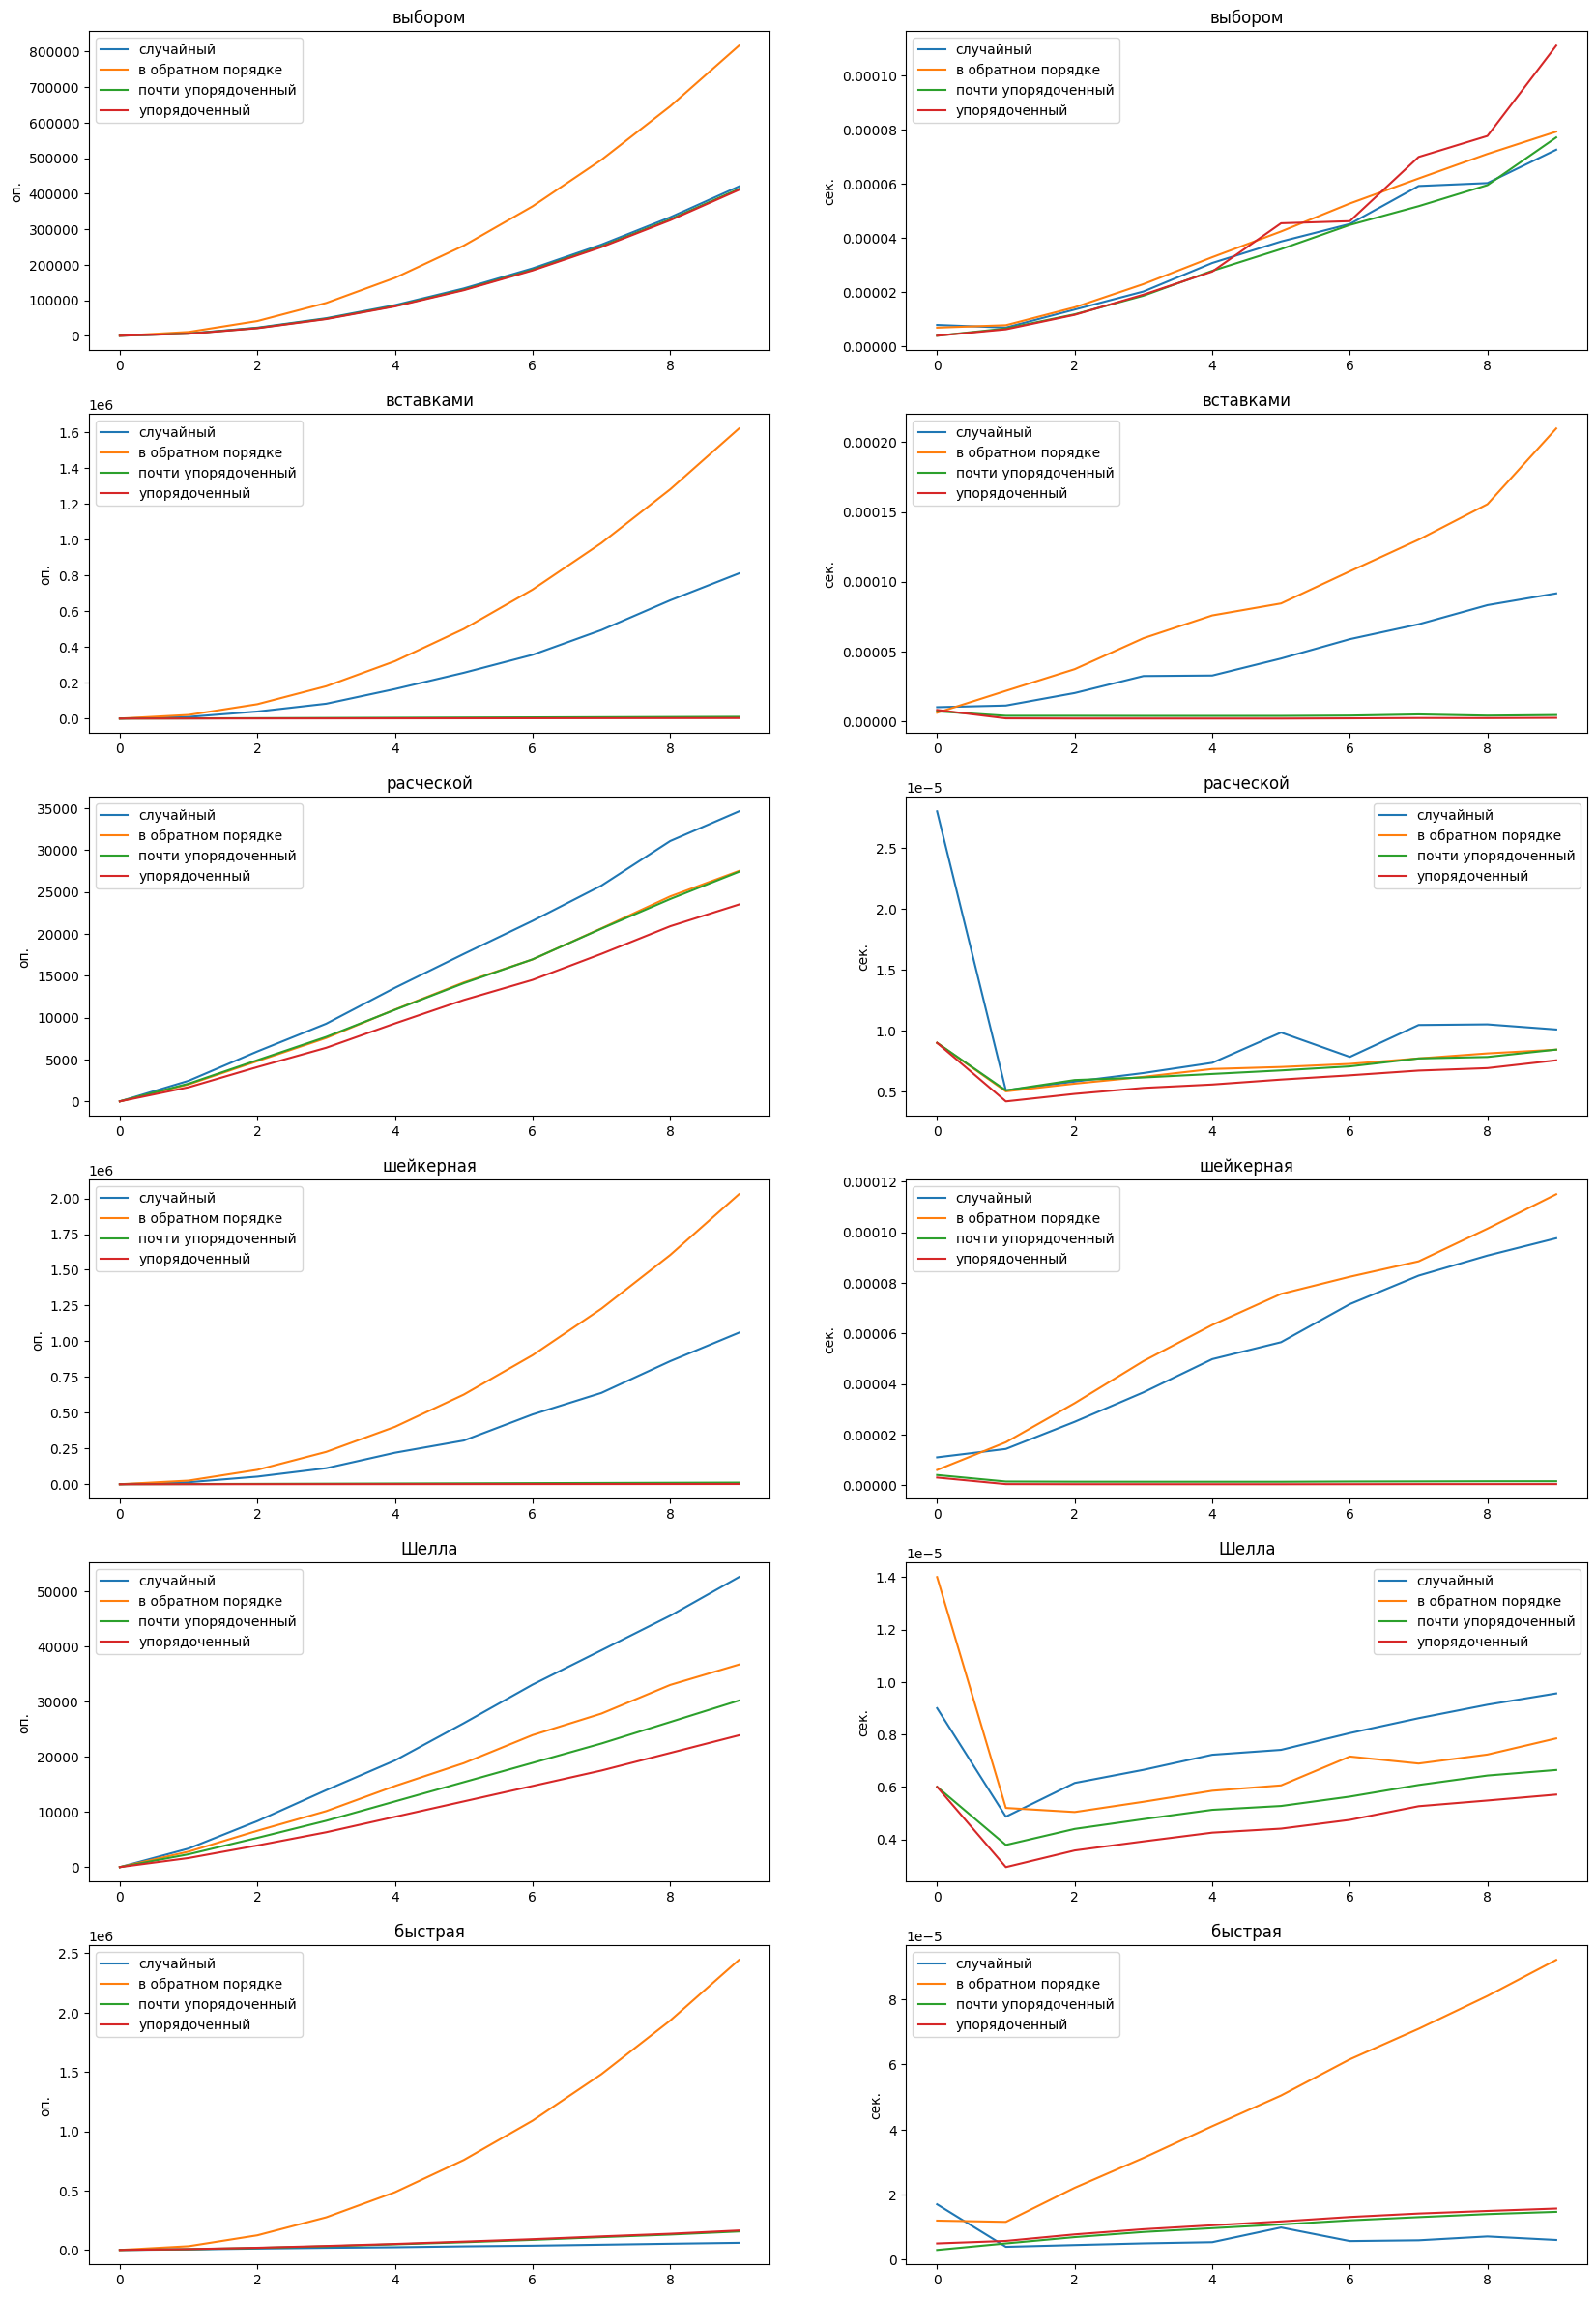

In [107]:
_old_value = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20.0, 30.0)

R = 1000
step = R // 10
trials = 1

plot_num = 1
for key in counted_algorithms:
    print("строим графики для сортировки '" + counted_algorithms[key]["name"] + "': ")
    plt.subplot(6, 2, plot_num)
    for plot in range(4):
        print(sort_types[plot][1], end = ': ')
        result = do_series(counted_algorithms[key]["func"], R, step, sort_types[plot][0], 'counter', trials, debug = True)
        plt.plot(result, label = sort_types[plot][1])
        print("", end = ', ')
    print("")
    plt.title(counted_algorithms[key]["name"])
    plt.ylabel('оп.')
    plt.legend()
    plt.subplot(6, 2, plot_num + 1)
    for plot in range(4):
        plt.plot(algorithms[key]["data"][sort_types[plot][0]], label = sort_types[plot][1])
    plt.title(counted_algorithms[key]["name"])
    plt.ylabel('сек.')
    plt.legend()
    plot_num += 2
plt.show()

plt.rcParams['figure.figsize'] = _old_value

Если графики в правом столбце пустые, значит вы не сохранили исходные данные в п. 2.3 работы (см. пометку "Не забудьте сохранить результаты...").

Второй столбец нам необходим для проверки корректности нашей схемы подсчета шагов. Если мы все сделали правильно и ничего не напутали, то левые и правые графики в нашей аналитической таблице должны быть похожими друг на друга. При этом заметим, что в правом столбце графики имеют более "дерганный" характер в силу вмешательства внешних факторов в оценку времени. В левом же столбце мы видим "чистую" абстрактную оценку сложности, не зависящую от деталей реализации, поэтому неровным в большей мере может оказаться только график для случайного характера входных данных.

### 3.2 Исследование порога эффективности

Запустите следующий код и изучите полученный график. На нем мы показали значения наших функций $T(n)$ для каждой из сортировок в худшем случае (когда массив отсортирован в обратном порядке) на массиве из 10 элементов.

Обратите внимание на график функции для эффективной сортировки. Из картинки следует, что для данных размеров массива она не выглядит такой уж эффективной. В зависимости от того, какой набор функций вам попался, может оказаться так, что на массиве из 10 элементов эффективная сортировка будет работать хуже всех. Это связано с тем, что несмотря на хорошую оценку доминирующей компоненты - $n\log(n)$, у этих функций, как правило, сравнительно большая константа $C$, и они начинают показывать свою эффективность при достаточно большом $n_0$.

Попробуйте подобрать такие значения R, при которых на графике будут четко видны точки пересечения, когда эффективная сортировка  начинает обгонять остальные (кроме, возможно, сортировки Шелла).

In [108]:
# подберите параметры в соответствии с заданием
R = 500
step = 1
trials = 10

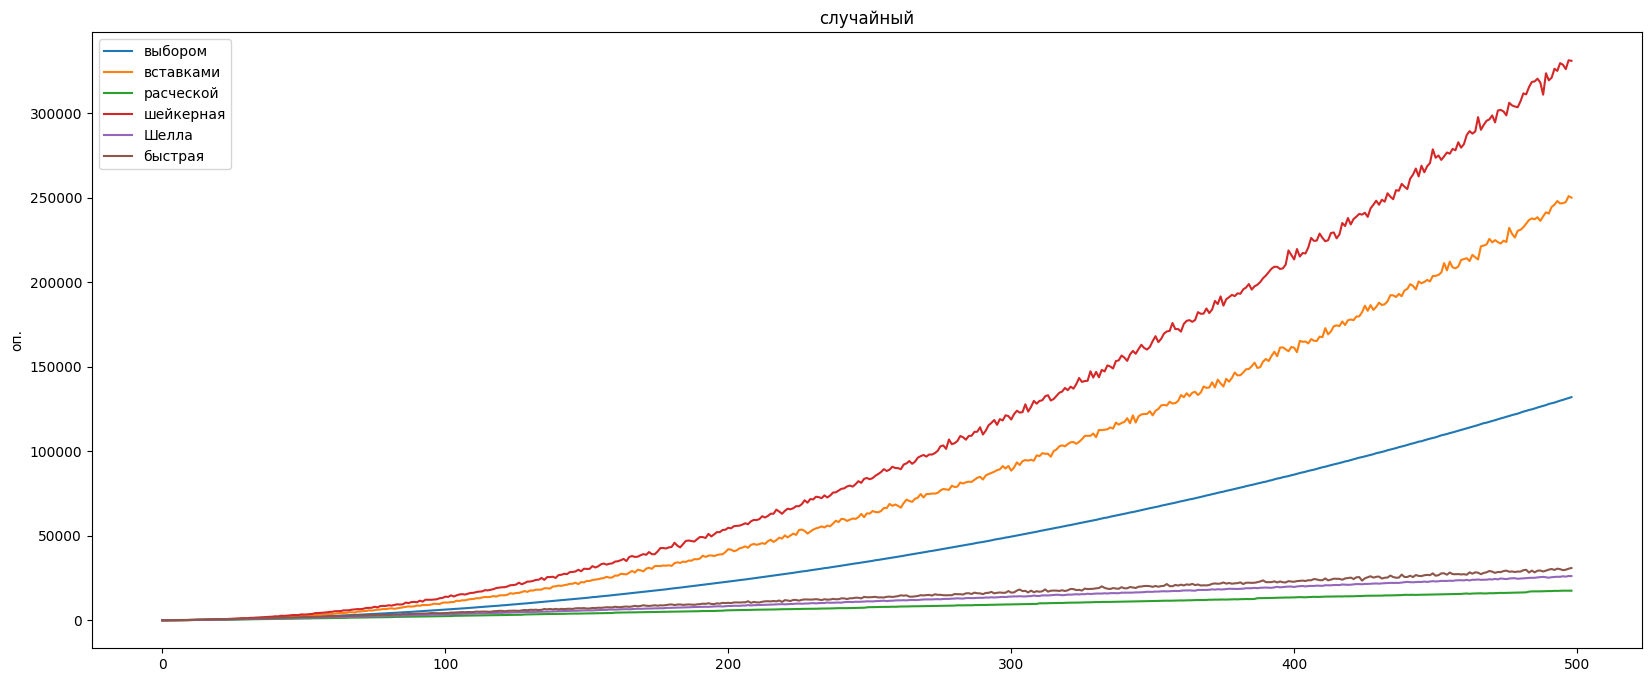

In [109]:
sort_type = 0
_old_value = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20.0, 8.0)

for key in algorithms:
    result = do_series(counted_algorithms[key]["func"], R, step, sort_types[sort_type][0], 'counter', trials)
    plt.plot(result, label = counted_algorithms[key]["name"])
plt.title(sort_types[sort_type][1])
plt.ylabel('оп.')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = _old_value

>**Вопрос №4**
>
>Укажите примерные минимальные размеры массивов, начиная с которых эффективная сортировка согласно нашим рассчетам начинает обгонять неэффективные (**не считая сортировку Шелла**). Для каждого квадратичного алгоритма будет своя граница.

> ### Шейкерная, вставками: R=50
> ### Выбором: R=70
> ### Расческой: R=?

### 3.3 Порядок роста и тайны сортировки Шелла

В заключительном параграфе мы посмотрим, что значит, что один алгоритм **на порядок** эффективнее другого, а также проанализируем поведение сортировки Шелла на различных последовательностях шагов.

#### 3.3.1 Вторая эффективная сортировка

Для анализа нам понадобятся обе эффективные сортировки, поэтому в блоке кода ниже реализуйте вторую эффективную сортировку - слиянием или быструю. Имя функции сортировки, указанное в шаблоне ниже, не меняйте.

In [110]:
################################################################################
# TODO: Напишите код второй эффективной сортировки с подсчетом шагов!          #
################################################################################

# сортировка слиянием
def counted_effective_sort_2(array):
    global counter
    ### НАЧАЛО ВАШЕГО КОДА
    mergeSort(array)
    ### КОНЕЦ ВАШЕГО КОДА

def merge(A: list, left: int, mid: int, right: int):
    global counter

    counter += 1
    AUX = []

    counter += 1
    i = left
    counter += 1
    j = mid + 1

    counter += 1
    while i <= mid and j <= right:
        counter += 1
        if A[i] <= A[j]:
            counter += 1
            AUX.append(A[i])
            counter += 1
            i += 1
        else:
            counter += 1
            AUX.append(A[j])
            counter += 1
            j += 1

    counter += mid + 1 - i
    AUX.extend(A[i:mid+1])
    counter += right + 1 - j
    AUX.extend(A[j:right+1])

    counter += right + 1 - left
    A[left:right+1] = AUX

def mergeSort(A, left=0, right=None):
    global counter

    counter += 1
    if right == None:
        counter += 1
        right = len(A) - 1

    counter += 1
    if right - left < 1:
        counter += 1
        return

    counter += 1
    mid = (right + left) // 2

    counter += 1
    mergeSort(A, left, mid)
    counter += 1
    mergeSort(A, mid+1, right)

    counter += 1
    merge(A, left, mid, right)

################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

In [111]:
# Определим и запомним, какая из сортировок быстрая, а какая слиянием
# заодно проверим, не забыли ли мы считать шаги
__counted_merge_sort = counted_effective_sort
__counted_quicksort = counted_effective_sort_2

counter = 0
test_array = generate_array(5000, sort_type = 'random')
test_array2 = test_array[:]
__counted_merge_sort(test_array)
counter1, counter = counter, 0
__counted_quicksort(test_array2)
counter2 = counter
if (counter1 == 0):
    print("\nОШИБКА: первая фукция эффективной сортировки тоже не считает шаги\n")
if (counter2 == 0):
    print("\nОШИБКА: вы забыли вписать подсчет шагов в вашу функцию сортировки counted_effective_sort_2\n")
if (counter1 < counter2):
    __counted_merge_sort, __counted_quicksort = __counted_quicksort, __counted_merge_sort
if (counter1 > 0 and counter2 > 0):
    print("OK")

### BEGIN TESTS
initial_array = list(range(10))
test_array = list(range(10))
random.shuffle(test_array)
counted_effective_sort_2(test_array)
assert arrays_are_similar(initial_array, test_array)
assert (counter1 > 0 and counter2 > 0)
### END TESTS

OK


#### 3.3.2 Сравнение функций одного порядка

Теперь еще раз вернемся к нашим квадратичным сортировкам и посмотрим, что означает, что они принадлежат к одному классу и порядок роста их сложности совпадает.

Запустите следующий код.

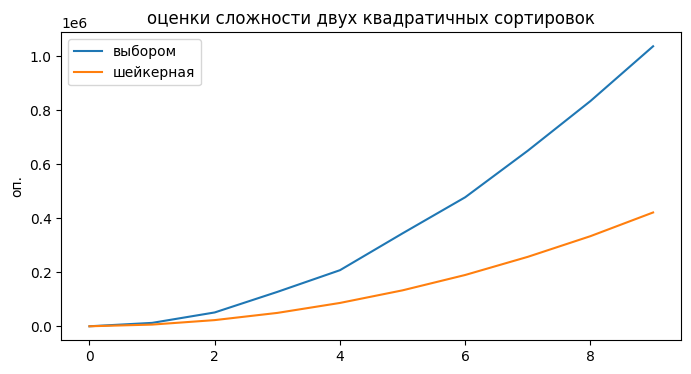

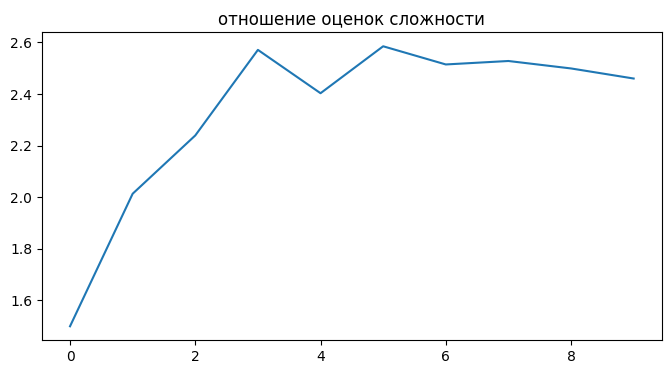

In [112]:
R = 1000
step = R // 10
trials = 1
result1 = do_series(counted_simple_sort_4, R, step, "random", 'counter', trials)
result2 = do_series(counted_simple_sort_1, R, step, "random", 'counter', trials)
plt.plot(result1, label = s1_name)
plt.plot(result2, label = s4_name)
plt.title("оценки сложности двух квадратичных сортировок")
plt.ylabel('оп.')
plt.legend()
plt.show()

order_relation = list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result1, result2)))
plt.title("отношение оценок сложности")
plt.plot(order_relation)
plt.show()

>**Вопрос №5**
>
>Обе сравниваемые сортировки квадратичные, причем время их работы в среднем есть не просто $O(n^2)$, а $\Theta(n^2)$, то есть они в точности квадратичные. Однако одна из функций растет быстрее другой. Как вы объясните этот факт?

> ### Так как они отличаются на коэффециент.

>**Вопрос №6**
>
>На втором графике изображено отношение скоростей роста функций, которое (если все идет по плану) не должно расти, а должно "колебаться" возле некоторой прямой $y=C$, где $C>0$. Что означает эта константа $C$ и как вы, глядя на эти два графика, понимаете выражение, что сравниваемые функции *одного порядка*, но одна из них *в несколько раз быстрее* другой.

> ### Это значит, что в отношении значение функций сокращается (т.к. порядок функций один), остается только отношение коэффициентов, т.е. константа.

#### 3.3.3 Сравнение функций разных порядков

Теперь заменим одну из сортировок сортировкой Шелла и построим те же графики.

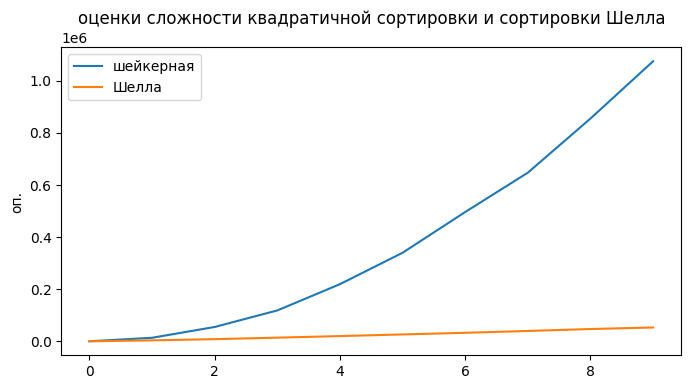

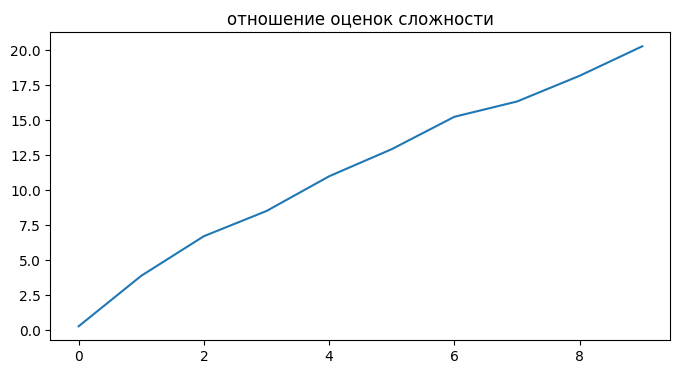

In [113]:
R = 1000
step = R // 10
trials = 1
result1 = do_series(counted_simple_sort_4, R, step, "random", 'counter', trials)
result2 = do_series(counted_shell_sort, R, step, "random", 'counter', trials)
plt.plot(result1, label = s4_name)
plt.plot(result2, label = "Шелла")
plt.title("оценки сложности квадратичной сортировки и сортировки Шелла")
plt.ylabel('оп.')
plt.legend()
plt.show()

order_relation = list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result1, result2)))
plt.title("отношение оценок сложности")
plt.plot(order_relation)
plt.show()

>**Вопрос №7**
>
>Как бы вы охарактеризовали скорости роста этих двух функций по отношению друг к другу? О чем свидетельствует второй график, ползущий вверх?

> ### Шейкерная сортировка растет гораздо быстрее, чем сортировка Шелла. Второй график свидетельствует о том, что асимптотическое время отличается не на константу.

#### 3.3.4 Сравнение сортировки Шелла с эффективными

Кажется, что сортировка Шелла зря не помещена на одну полку с эффективными сортировками из класса $O(n\log n)$! Ведь она ведет себя также хорошо? Или нет? Чтобы ответить на этот вопрос, сравним сортировку Шелла и **сортировку слиянием**.

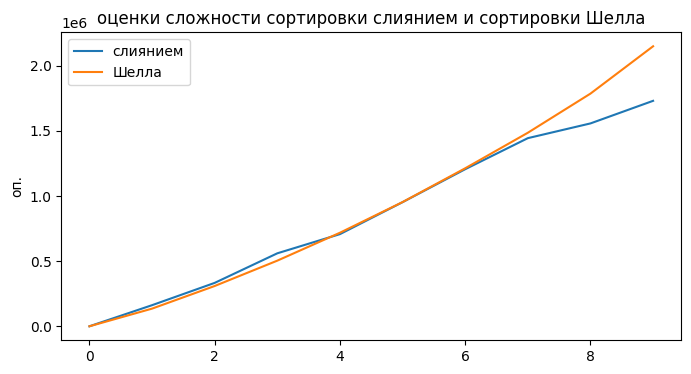

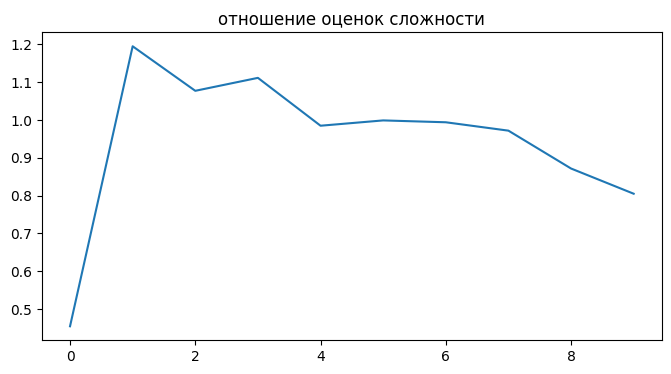

In [114]:
R = 20000
step = R // 10
trials = 1
result1 = do_series(__counted_merge_sort, R, step, "random", 'counter', trials)
result2 = do_series(counted_shell_sort, R, step, "random", 'counter', trials)
plt.plot(result1, label = "слиянием")
plt.plot(result2, label = "Шелла")
plt.title("оценки сложности сортировки слиянием и сортировки Шелла")
plt.ylabel('оп.')
plt.legend()
plt.show()

order_relation = list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result1, result2)))
plt.title("отношение оценок сложности")
plt.plot(order_relation)
plt.show()

Посмотрите на два графика и подумайте - что же эффективней? Сортировка Шелла? Верхний график явно свидетельствует о том, что разрыв между сортировкой Шелла и сортировкой слиянием медленно, но неуклонно растет и явно не в пользу последней.

Но давайте теперь посмотрим на второй график. Посмотрите внимательно на код и вы увидите, что это отношение сортировки **слиянием** к **Шелла** (вспомним, что дробь будет стремиться к нулю, если знаменатель растет быстрее числителя), а не наоборот и судя по графику оно не стабилизируется вокруг какой-то константы, а медленно и уверено ползет вниз к нулю. Т.е., судя по второму графику, сортировка слиянием должна быть на порядок быстрее Шелла. Как это возможно?

>**Вопрос №8**
>
>Попробуйте ответить на этот вопрос экспериментально. Найдите такой размер массива - $n_0$, при котором сортировка слиянием становится быстрее сортировки Шелла. (Примечание: подбирать нужно параметр R). Отвечая на вопрос, вспомните, в каком масштабе у вас ось абсцисс.

> n0 = 20000

#### 3.3.5 Призовые места

А что же быстрая сортировка? Как она себя ведет по отношению к двум рассмотренным? Все расставит по своим местам следующие графики. Заодно удостоверимся, что быстрая и сортировка слиянием находятся в одной "весовой категории".

В следующем блоке кода будет использовано то значение параметра R, которое вы подобрали на предыдущем шаге.

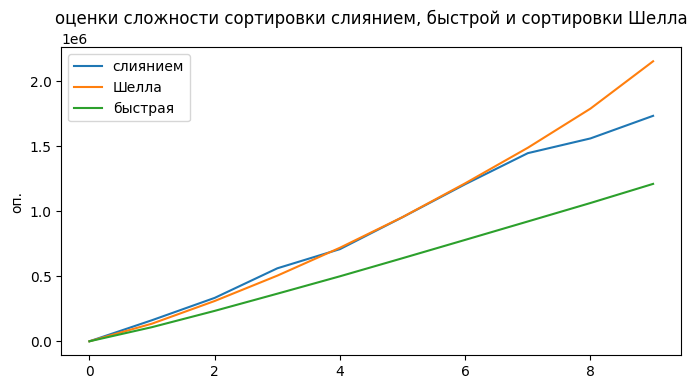

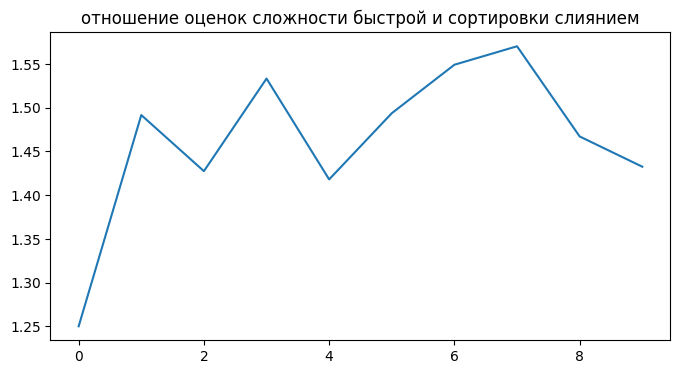

In [115]:
result3 = do_series(__counted_quicksort, R, step, "random", 'counter', trials)
plt.plot(result1, label = "слиянием")
plt.plot(result2, label = "Шелла")
plt.plot(result3, label = "быстрая")
plt.title("оценки сложности сортировки слиянием, быстрой и сортировки Шелла")
plt.ylabel('оп.')
plt.legend()
plt.show()

order_relation = list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result1, result3)))
plt.title("отношение оценок сложности быстрой и сортировки слиянием")
plt.plot(order_relation)
plt.show()

#### 3.3.6 Так что же с сортировкой Шелла?

Завершает расчетно-графическую работу серия тестов сортировки Шелла. Давай посмотрим, как она ведет себя при различных последовательностях шагов.

По-умолчанию (если вы не меняли шаблон), в ней используется последовательность Чиура
> <code>gaps = [701, 301, 132, 57, 23, 10, 4, 1]</code>.

В коде ниже в качестве эксперимента взята еще последовательность Пратта
><code>gaps = [121, 40, 13, 4, 1]</code>.

In [116]:
R = 10000
step = R // 20
trials = 1

gaps = [701, 301, 132, 57, 23, 10, 4, 1]
result1 = do_series(counted_shell_sort, R, step, "random", 'counter', trials)

gaps = [121, 40, 13, 4, 1]
result2 = do_series(counted_shell_sort, R, step, "random", 'counter', trials)

Придумайте и запишите в ячейку ниже свою собственную последовательность. Только помните, что она должна заканчиваться на 1.

In [117]:
####################################################################################
# TODO: придумайте свою собственную последовательность шагов, заканчивающуюся на 1 #
####################################################################################
gaps = [1]
### ### НАЧАЛО ВАШЕГО КОДА
gaps = [701, 301, 121, 57, 13, 4, 1]
### КОНЕЦ ВАШЕГО КОДА
################################################################################
#                                 КОНЕЦ БЛОКА TODO                             #
################################################################################

Все готово для финальных графиков. Запустите следующую ячейку.

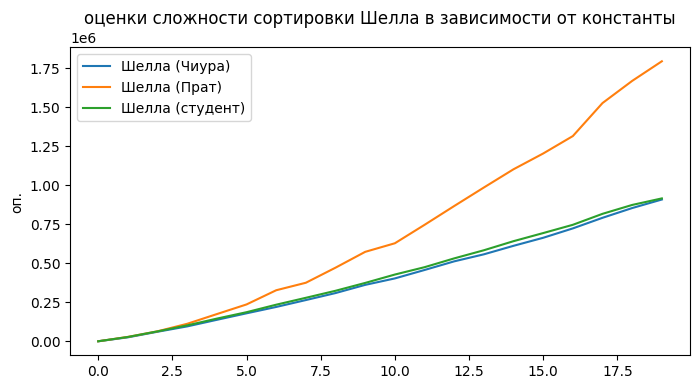

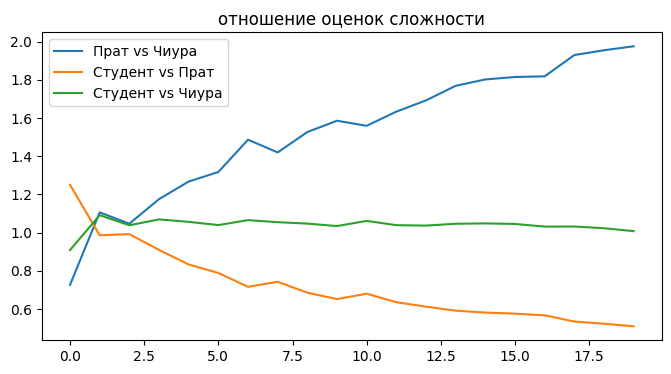

In [118]:
result3 = do_series(counted_shell_sort, R, step, "random", 'counter', trials)

plt.plot(result1, label = "Шелла (Чиура)")
plt.plot(result2, label = "Шелла (Прат)")
plt.plot(result3, label = "Шелла (студент)")
plt.title("оценки сложности сортировки Шелла в зависимости от константы")
plt.ylabel('оп.')
plt.legend()
plt.show()

plt.title("отношение оценок сложности")
plt.plot(list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result2, result1))), label = "Прат vs Чиура")
plt.plot(list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result3, result2))), label = "Студент vs Прат")
plt.plot(list(map(lambda x: 0 if x[1] == 0 else x[0]/x[1], zip(result3, result1))), label = "Студент vs Чиура")
plt.legend()
plt.show()

Из графиков видно, что эффективность одной и той же функции сортировки Шелла может отличаться на порядок в зависимости от выбранной последовательности шагов! Мы видим (если только вы не придумали супер-неэффективную последовательность шагов), что отношение Прат/Чиура медленно, но растет, что уж говорить об отношении Студент/Чиура. Если, конечно, вам не удалось побить наилучший на сегодняшний день результат...

Если нет, то результат Прата улучшить вполне возможно. Это и будет заключительное в данной РГР задание.

>**Вопрос №9**
>
> Подберите последовательность шагов, при которой сортировка Шелла будет на порядок лучше сортировки с последовательностью шагов Прата.

> ### 701, 301, 121, 57, 13, 4, 1